NOMBRE: EDGAR ERNESTO CRISTAL COYOY
CARNÉ: 22007686

Parte 1: Numpy:

In [151]:
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import random

1) ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [4]:
bool_array = [True] * 1000
size = sys.getsizeof(bool_array)
print("El tamaño es:", size, "bytes")

El tamaño es: 8056 bytes


2) Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [5]:
grupo1100 = np.arange(100, 1, -2)
print("Ultimos 10:", grupo1100[-10:])

Ultimos 10: [20 18 16 14 12 10  8  6  4  2]


3) Dado el array
2 4 5 6
0 3 7 4
8 8 5 2
1 5 6 1

In [31]:
cc = np.array(([2,4,5,6],[0,3,7,4],[8,8,5,2],[1,5,6,1]))
cc

array([[2, 4, 5, 6],
       [0, 3, 7, 4],
       [8, 8, 5, 2],
       [1, 5, 6, 1]])

Seleccione con una instrucción el subarray de elementos
0 3 7 4

In [33]:
print(cc[1, :])

[0 3 7 4]


Después, seleccione el subarray de elementos
2 5
8 5

In [34]:
subarray = cc[::2,::2]
print(subarray)

[[2 5]
 [8 5]]


4) Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [47]:
a = np.array([1,4,2,7])
b = np.array([1,3,2,9])
c= a-b
media_aritmetica=np.mean(c)
media_aritmetica


-0.25

5) Tengo valores de cordenadas (x, y) en las columnas del array
1.33 4.5
30.0 10.7
70.2 0.5

In [48]:
valor = np.array(([1.33,4.5],[30.0,10.7],[70.2,0.5]))
valor

array([[ 1.33,  4.5 ],
       [30.  , 10.7 ],
       [70.2 ,  0.5 ]])

Agregue a este array las coordenadas (37.1, -3.6). 
Muestre en pantalla las dimensiones del nuevo 
array.

In [55]:
valor_r = np.append(valor,[37.1,-3.6]).reshape(-1,2)
valor_r

array([[ 1.33,  4.5 ],
       [30.  , 10.7 ],
       [70.2 ,  0.5 ],
       [37.1 , -3.6 ]])

In [57]:
valor.shape, valor_r.shape

((3, 2), (4, 2))

6) Copie el array del ejercicio anterior. Traspóngalo (. 
Agregue ahora dos nuevos pares de coordenadas: (10.8, 
3.0) y (35.8, 12.0)

In [67]:
valor_copy = valor_r.copy()
valor_copy.T
valor_copy=valor_copy.T
coords = np.array([[10.8, 35.8], [3.0, 12.0]])
valor_copy = np.append(valor_copy, coords, axis = 1)
valor_copy


array([[ 1.33, 30.  , 70.2 , 37.1 , 10.8 , 35.8 ],
       [ 4.5 , 10.7 ,  0.5 , -3.6 ,  3.  , 12.  ]])

PARTE 2: EXPLOTACIÓN Y MENERÍA DE DATOS

Con el dataset nucleospoblacion.csv adjunto al laboratorio, luego responda las siguientes preguntas usando pandas y matplotlib.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

CARGAR BASE DE DATOS

In [9]:
df = pd.read_csv("C:/Users/ecris/Documents/GALILEO 2023/Preng - Curso Phyton/Lab_3/Lab_3/NucleosPoblacion.csv")
df.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


1) ¿Cuántos Municipios tienen más de 100000 habitantes?.

In [10]:
num_municipios = len(df[df["Poblacion"] > 100000]["Municipio"].unique())

print(f"Hay {num_municipios} municipios con más de 100000 habitantes.")

Hay 62 municipios con más de 100000 habitantes.


2. Realice una gráfica de barras sobre la población de cada ciudad, ordenela de menor a mayor y responda:

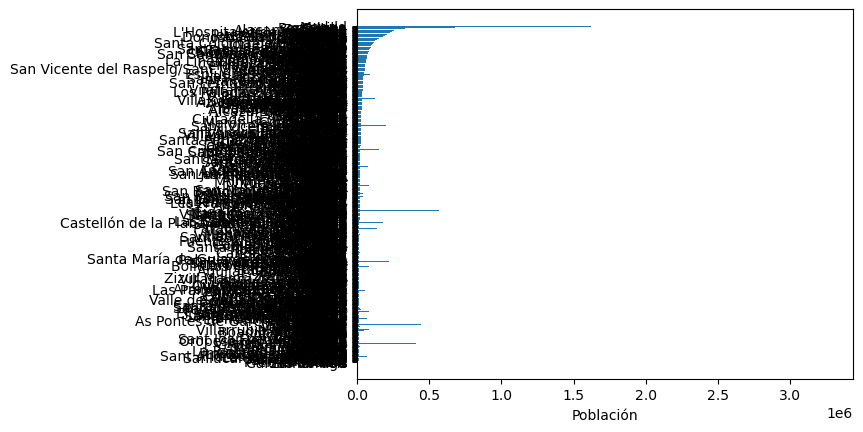

In [17]:
df_orden = df.sort_values("Poblacion")
plt.barh(df_orden["Municipio"], df_orden["Poblacion"])
plt.xlabel("Población")
plt.show()

 a. ¿Cuál es la segunda ciudad más poblada?

In [35]:
ciudad = df_orden.iloc[-2]["Municipio"]
print("La 2da. ciudad más poblada es:", (ciudad))

La 2da. ciudad más poblada es: Barcelona


 b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

In [38]:
pgranada = df_orden[df_orden["Municipio"] == "Granada"].index.item() + 1
print("Granada ocupa la posición número en el ranking de ciudades más pobladas:",(pgranada))

Granada ocupa la posición número en el ranking de ciudades más pobladas: 273


3) ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?

In [45]:
mun_extrem = df[df['Provincia'] == 'Extremadura']
num_mun_5000 = len(mun_extrem[municipios_extremadura['Poblacion'] > 5000])

print("El número de municipios en extremadura con más de 5,000 habitantes es:", num_mun_5000)

El número de municipios en extremadura con más de 5,000 habitantes es: 0


4) ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [70]:
mun_n = df.loc[df['Y'].idxmax()]

print("El municipio más al norte es:", (mun_n)["Municipio"])
print ("En la provincia de:", (mun_n)["Provincia"])
print ("Con una población en habitantes de:", (mun_n)["Poblacion"])

El municipio más al norte es: Viveiro
En la provincia de: Lugo
Con una población en habitantes de: 16211.0


5) Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.


In [114]:
df_gda = df.loc[df["Provincia"] == "Granada"]

estad_pob = df_gda['Poblacion'].describe()

print("Estadísticas de la población de los municipios de Granada:\n", (estad_pob))

Estadísticas de la población de los municipios de Granada:
 count        20.000000
mean      30217.850000
std       50355.491715
min       10386.000000
25%       13146.500000
50%       17526.000000
75%       21739.750000
max      239154.000000
Name: Poblacion, dtype: float64


6) Realice un histograma con la población de los Municipios para cada una de las provincias.

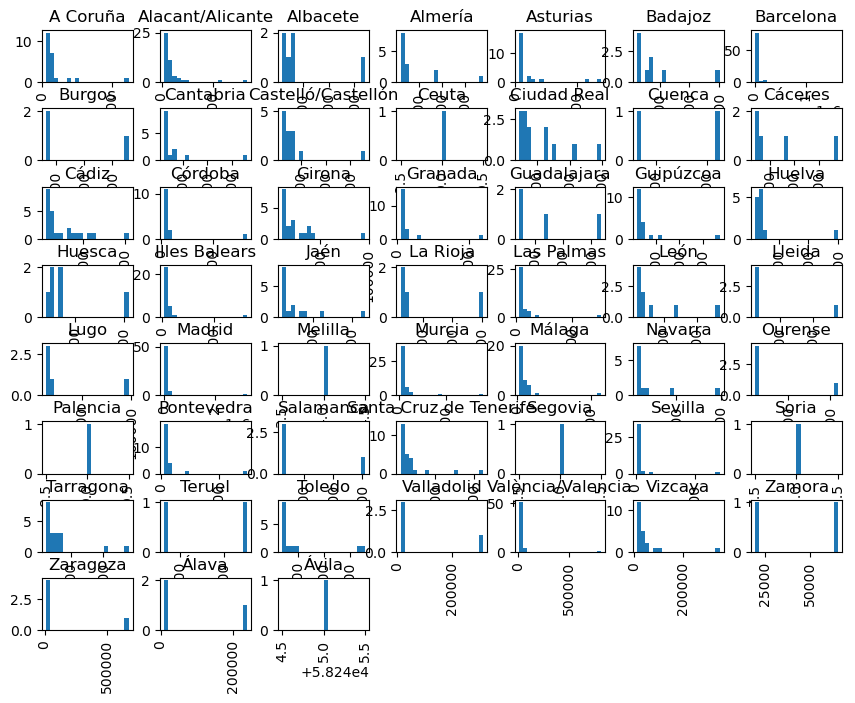

In [115]:
df.hist(column='Poblacion', by='Provincia', bins=20, figsize=(10, 8))

plt.show()

7) Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [144]:
municipios = df["Municipio"].unique().tolist()
muestra = random.sample(municipios, 50)
muestra_data = df[df["Municipio"].isin(muestra)]

poblacion_mean = muestra_data["Poblacion"].mean()
poblacion_std = muestra_data["Poblacion"].std()

print("Promedio de población de los 50 municipios seleccionados:", (round(poblacion_mean, 2)))
print("Desviación estándar de la población de los 50 municipios seleccionados:", (round(poblacion_std, 2)))

Promedio de población de los 50 municipios seleccionados: 42953.85
Desviación estándar de la población de los 50 municipios seleccionados: 61648.76


8) Dígame los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [155]:
madrid_latitud = df[df['Municipio'] == 'Madrid']['X'].values[0]
madrid_longitud = df[df['Municipio'] == 'Madrid']['Y'].values[0]

df_municipios_ntmadrid = df[df['Municipio'] != 'Madrid']

In [157]:
distancias = np.sqrt((df_municipios_ntmadrid['Y'] - madrid_latitud)**2 + (df_municipios_ntmadrid['X'] - madrid_longitud)**2)

municipio_mas_cercano = distancias.idxmin()
municipio_mas_lejano = distancias.idxmax()

nombre_municipio_mas_cercano = df_municipios_ntmadrid.loc[municipio_mas_cercano, 'Municipio']
nombre_municipio_mas_lejano = df_municipios_ntmadrid.loc[municipio_mas_lejano, 'Municipio']

print("El municipio más cercano a Madrid es:", nombre_municipio_mas_cercano)
print("El municipio más lejano a Madrid es:", nombre_municipio_mas_lejano)

El municipio más cercano a Madrid es: Maó
El municipio más lejano a Madrid es: Carballo
